<h1> RIO-125: Rank Features of a Smartphone - Build a Python Application to Classify and Rank Dataset</h1>
<h2>Summary</h2>
The objective of this project is to build a Python application that ranks the features of a smartphone based on the requests received from various users.

By the end of the project, you should be able to:

- Create a dataset
- Clean the dataset
- Sanitize the dataset
- Populate the dataset in application
- Classify the dataset into 2 different datasets containing hardware and software requests
- Merge the classified datasets
- Rank the final dataset

<h2>Dataset</h2>
The dataset contains the following features:

# **RIO-125: Rank Features of a Smartphone - Build a Python Application to Classify and Rank Dataset**

# Summary

The objective of this project is to build a Python application that ranks the features of a smartphone based on the requests received from various users.

By the end of the project, you should be able to:


*   Create a dataset
*   Clean the dataset 
*   Sanitize the dataset
*   Populate the dataset in application
*   Classify the dataset into 2 different datasets containing hardware and software requests 
*   Merge the classified datasets
*   Rank the final dataset

# Dataset
The dataset contains the following features:



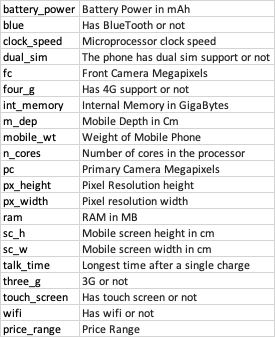

In [1]:
#Importing necessary libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

/Users/saras/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#reading the training data
df = pd.read_csv("MobileTrain.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


<h2>1. Understanding the dataset

In [3]:
df.shape

(2000, 21)

In [4]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
#function to understand dataset 

def understand_data(data) :
    
    return(pd.DataFrame({"Datatype":data.dtypes,
                         "No of NAs":data.isna().sum(),
                         "No of Levels":data.nunique(axis=0,dropna=True),
                         "Levels": data.apply(lambda x: str(x.unique()),axis=0)}))
understand_data(df)

,Datatype,No of NAs,No of Levels,Levels
battery_power,int64,0,1094,[ 842 1021 563 ... 1139 1467 858]
blue,int64,0,2,[0 1]
clock_speed,float64,0,26,[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1. 0.9 1...
dual_sim,int64,0,2,[0 1]
fc,int64,0,20,[ 1 0 2 13 3 4 5 7 11 12 16 6 15 8 9 ...
four_g,int64,0,2,[0 1]
int_memory,int64,0,63,[ 7 53 41 10 44 22 24 9 33 17 52 46 13 23 49 ...
m_dep,float64,0,10,[0.6 0.7 0.9 0.8 0.1 0.5 1. 0.3 0.4 0.2]
mobile_wt,int64,0,121,[188 136 145 131 141 164 139 187 174 93 182 1...
n_cores,int64,0,8,[2 3 5 6 1 8 4 7]


- Binary Values  - blue, dual_sim, four_g,three_g,touch_screen,wifi
- Discrete data - price_range,n_cores
- No missing values in the entire dataset

In [7]:
#Checking for duplicate values 
df[df.duplicated(keep= 'first')]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


- No Duplicate rows in the dataframe.

<h2>2. Exploratory Data Analysis</h2>
<h3>2.1 Univariate Analysis

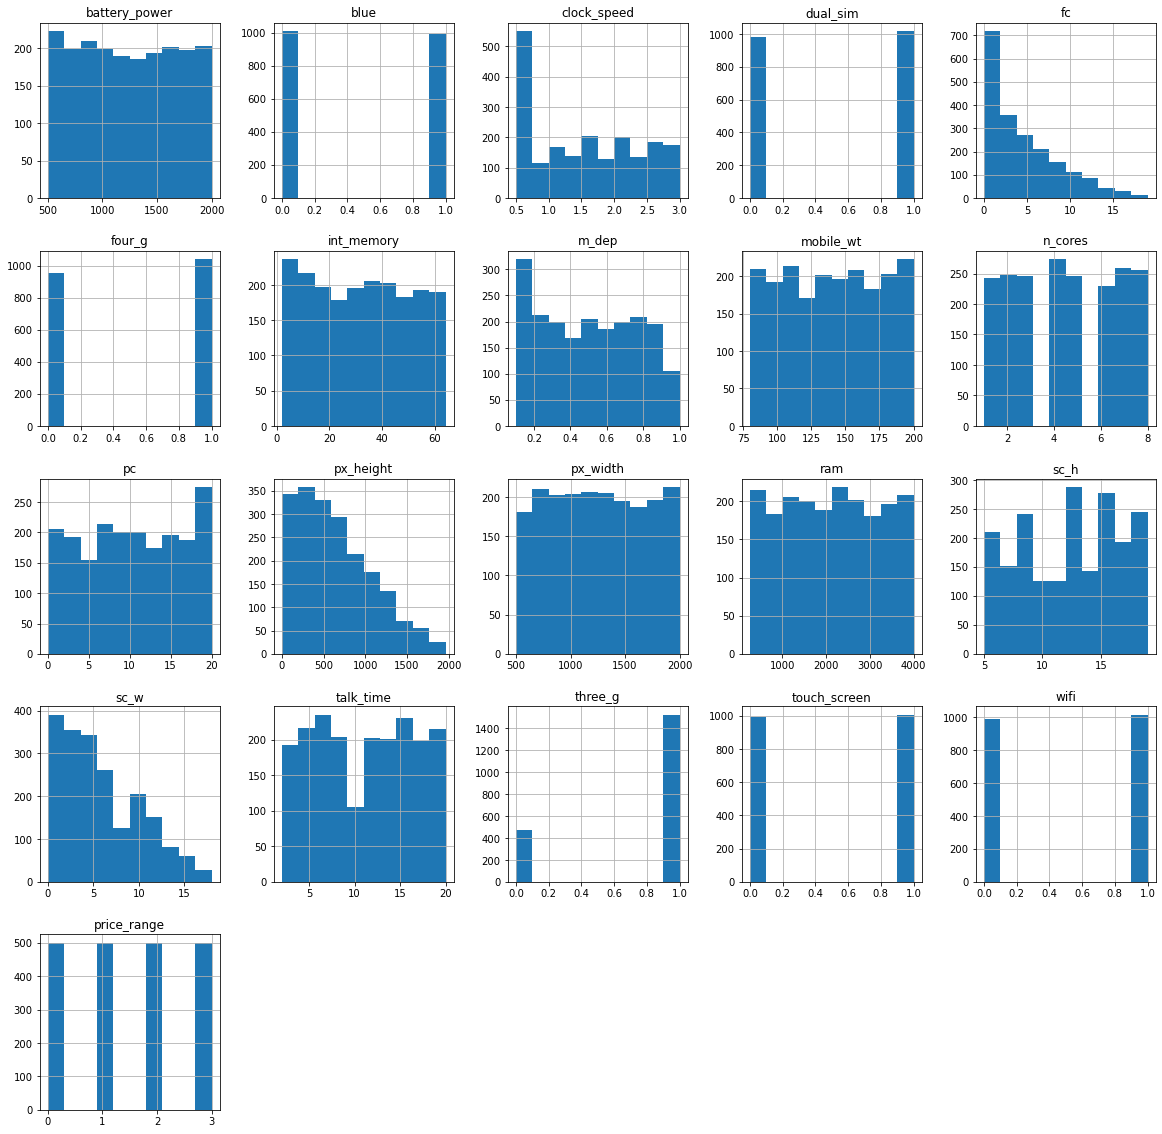

In [8]:
#Plotting the histogram to understand more about variables
df.hist(figsize = (20,20))
plt.show()

In [9]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

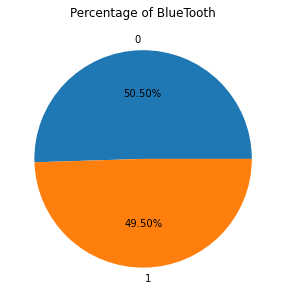

In [10]:
#Analysis based on Percentages using Pie Chart
count=df["blue"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of BlueTooth")
plt.show()

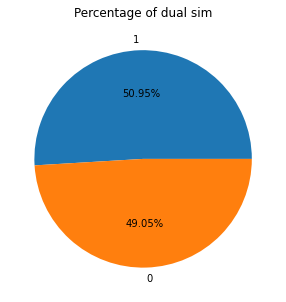

In [11]:
count=df["dual_sim"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of dual sim")
plt.show()

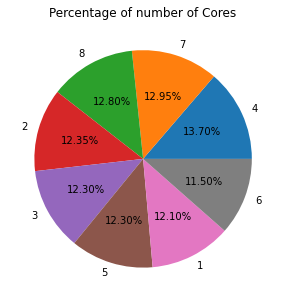

In [12]:
count=df["n_cores"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of number of Cores")
plt.show()

- Quad Core is the most sort after. 

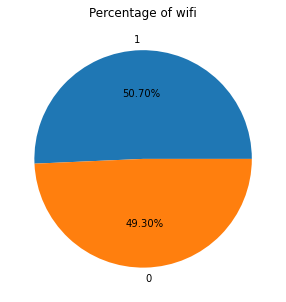

In [13]:
count=df["wifi"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of wifi")
plt.show()

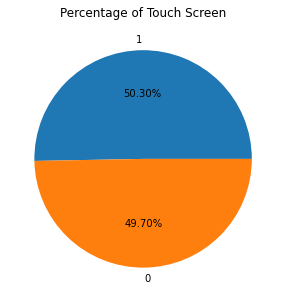

In [14]:
count=df["touch_screen"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of Touch Screen")
plt.show()

<h3> 2.2 Bivariate Analysis

Distribution of  battery_power with respect to price range


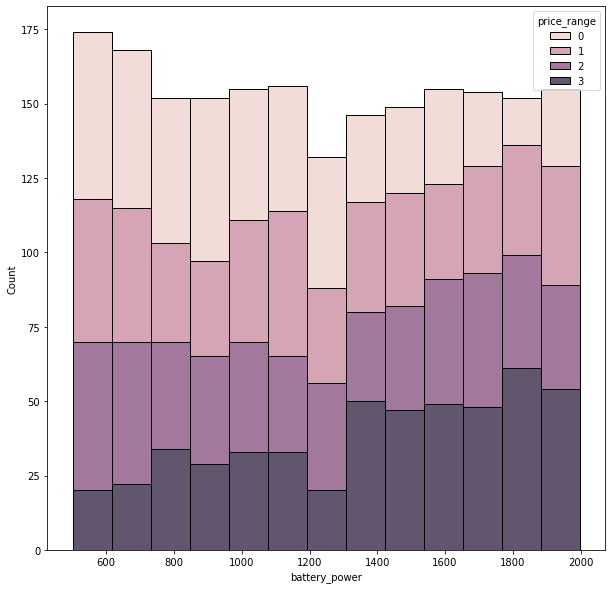

Distribution of  blue with respect to price range


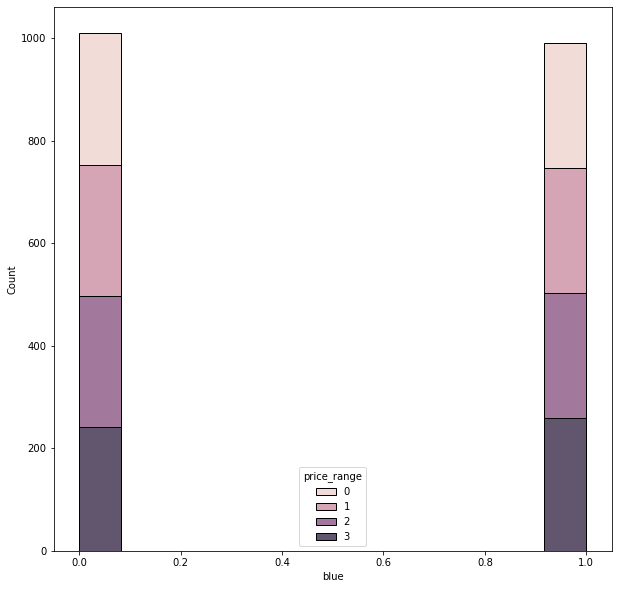

Distribution of  clock_speed with respect to price range


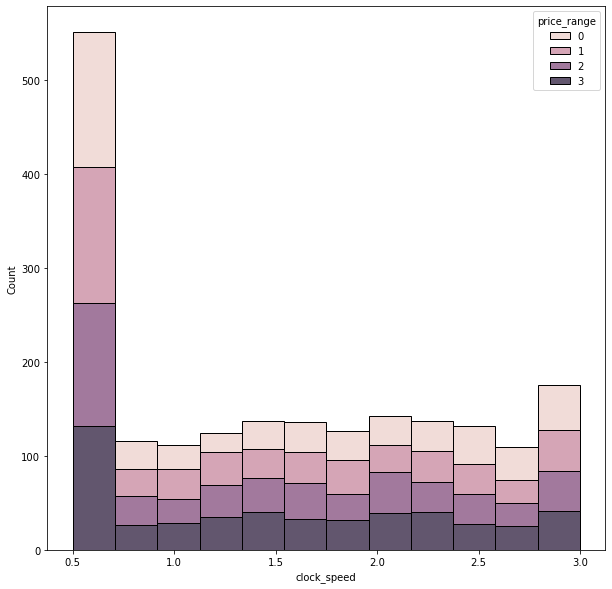

Distribution of  dual_sim with respect to price range


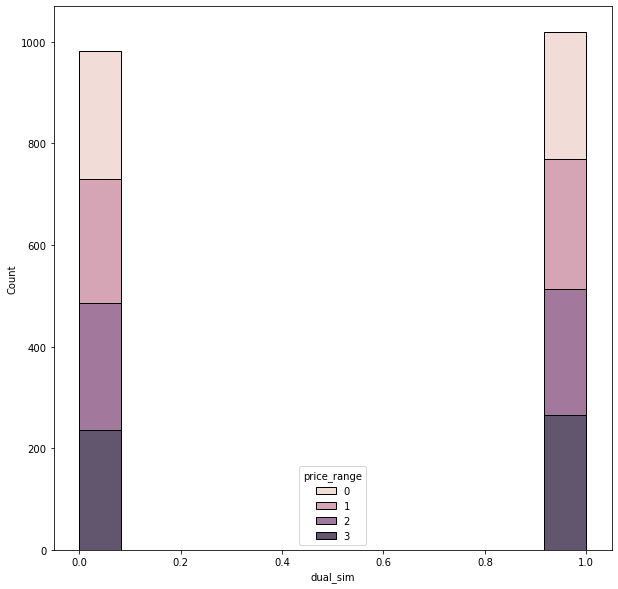

Distribution of  fc with respect to price range


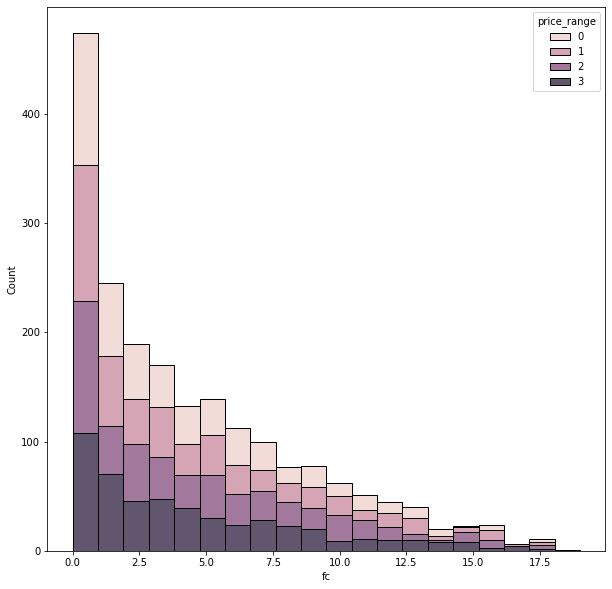

Distribution of  four_g with respect to price range


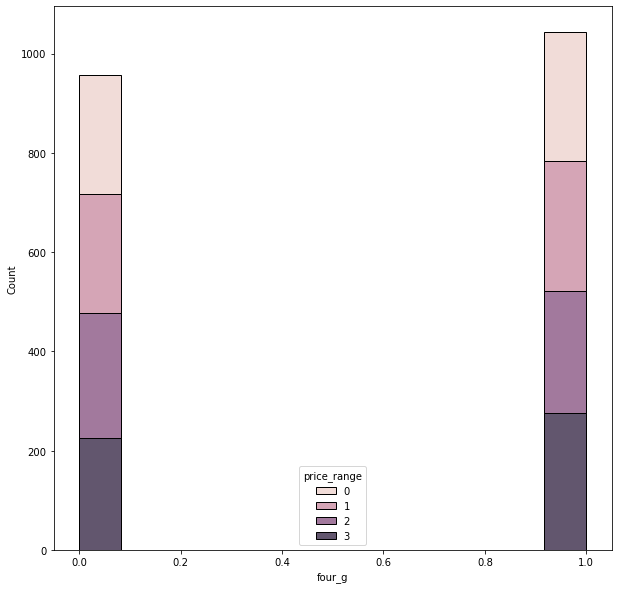

Distribution of  int_memory with respect to price range


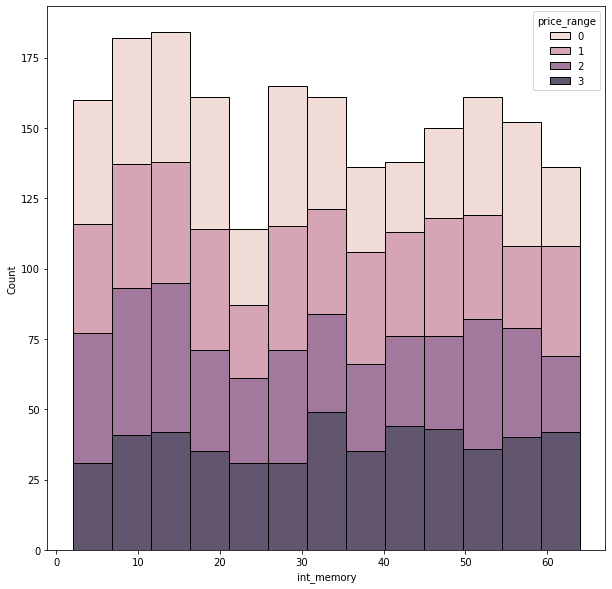

Distribution of  m_dep with respect to price range


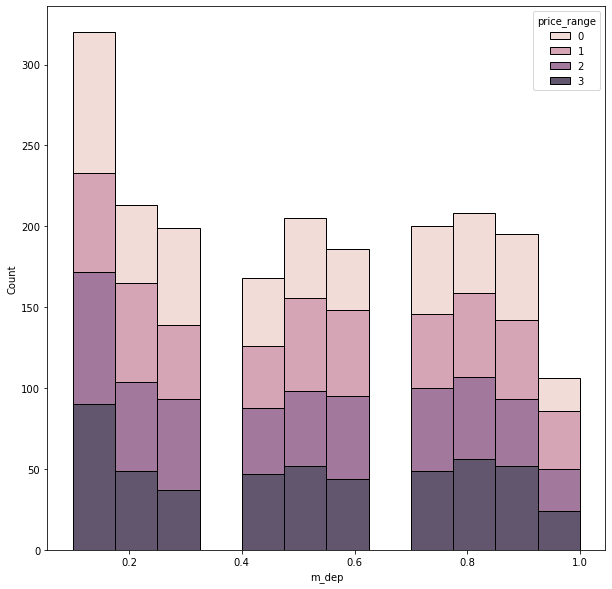

Distribution of  mobile_wt with respect to price range


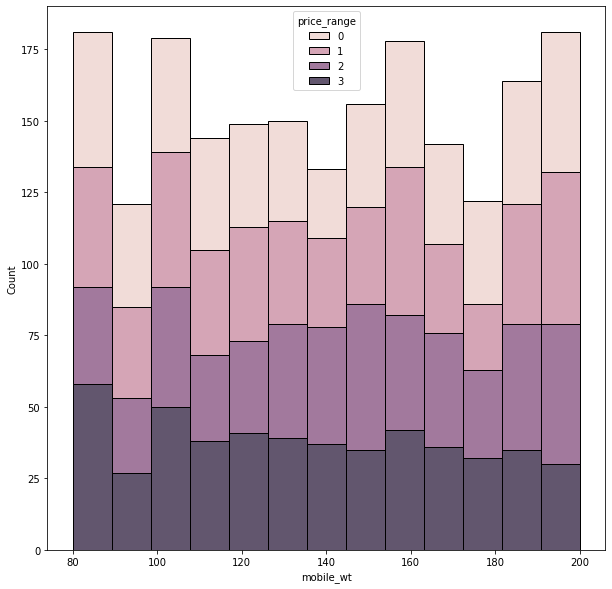

Distribution of  n_cores with respect to price range


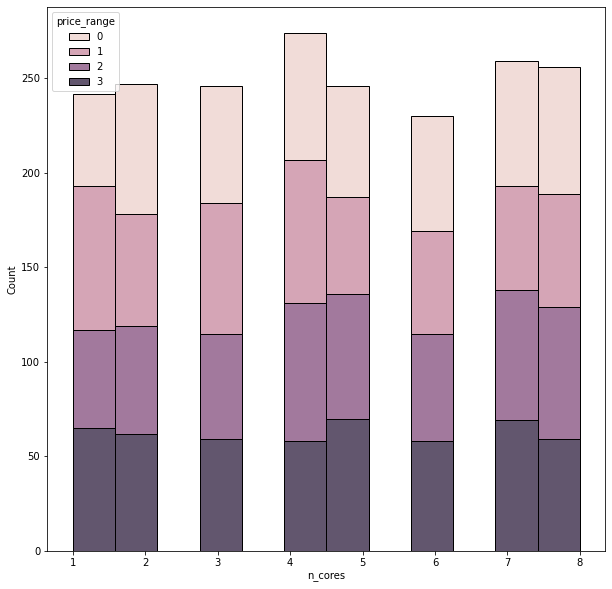

Distribution of  pc with respect to price range


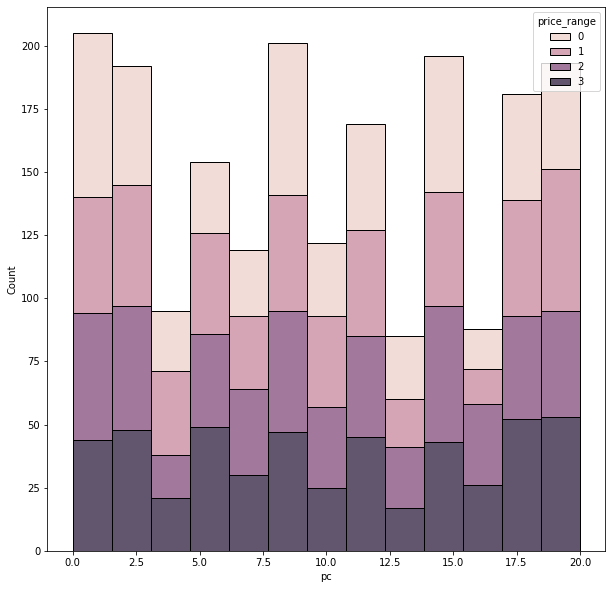

Distribution of  px_height with respect to price range


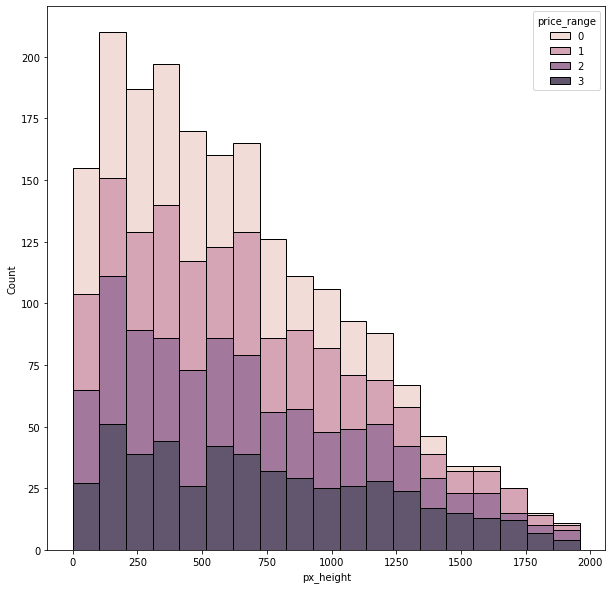

Distribution of  px_width with respect to price range


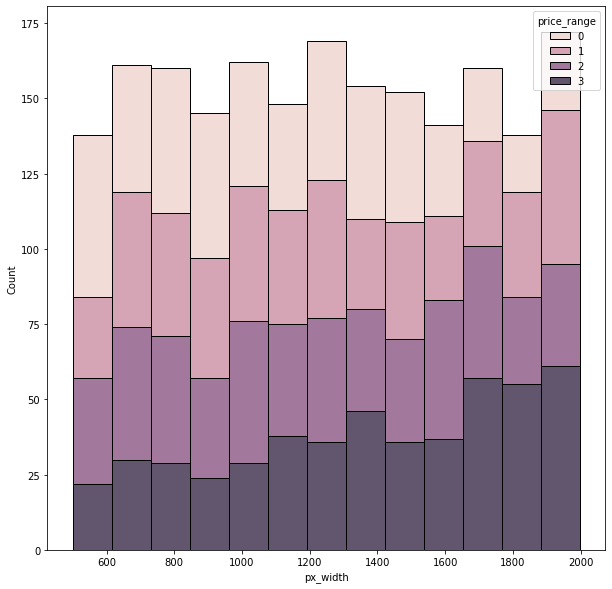

Distribution of  ram with respect to price range


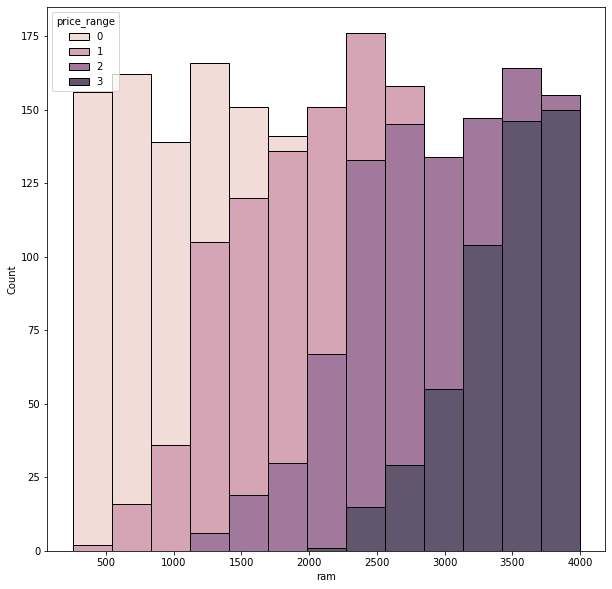

Distribution of  sc_h with respect to price range


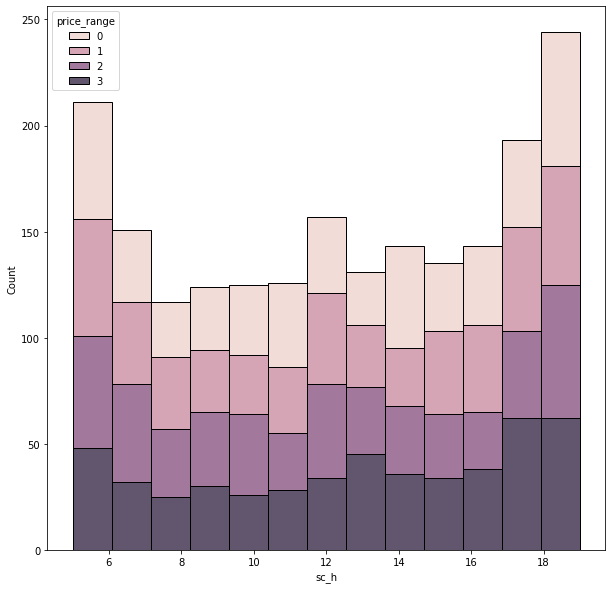

Distribution of  sc_w with respect to price range


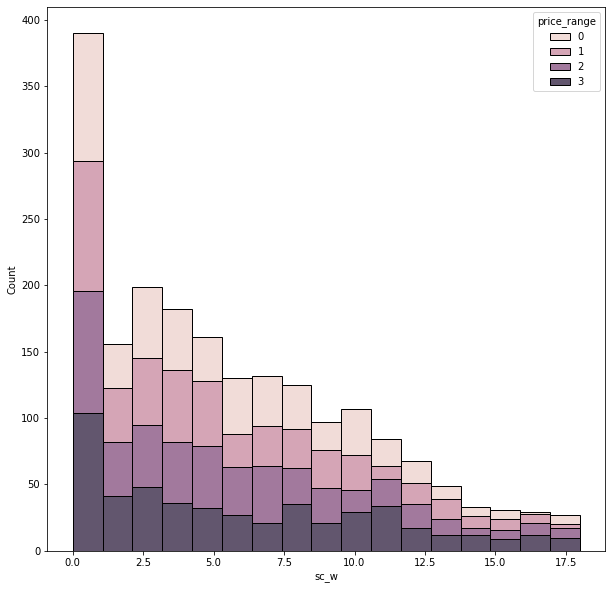

Distribution of  talk_time with respect to price range


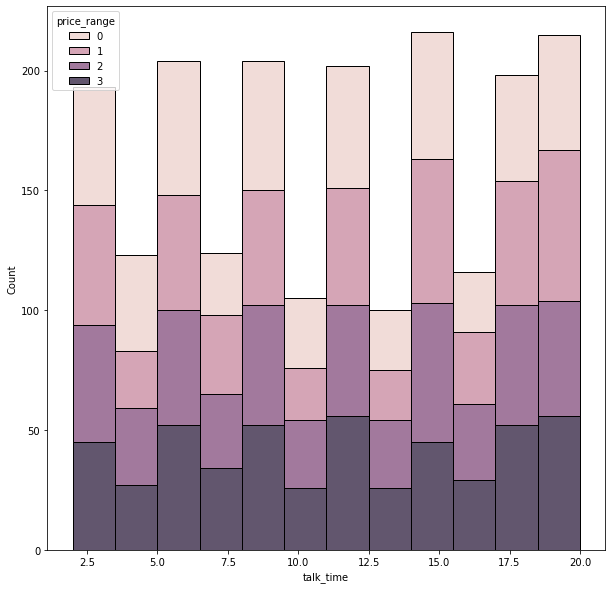

Distribution of  three_g with respect to price range


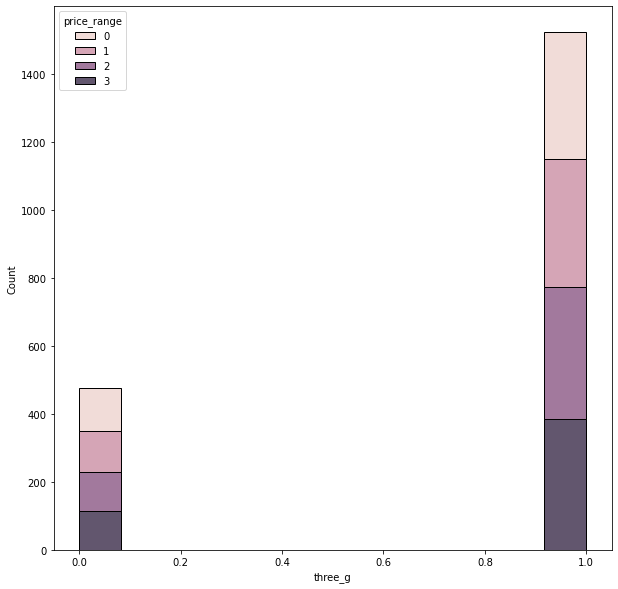

Distribution of  touch_screen with respect to price range


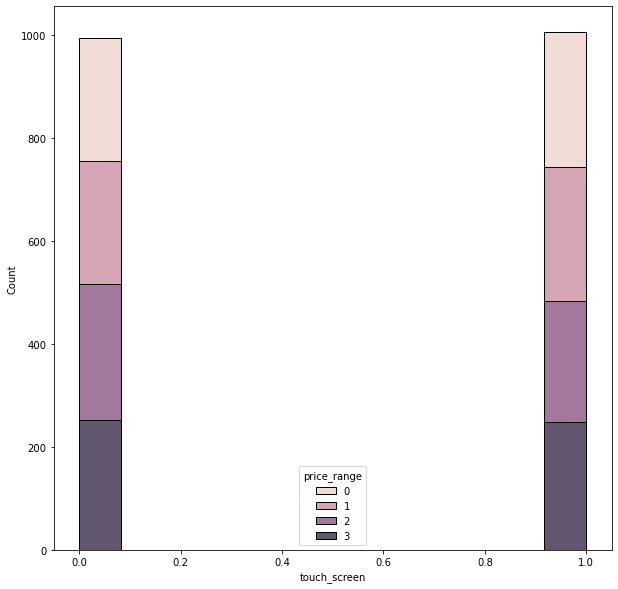

Distribution of  wifi with respect to price range


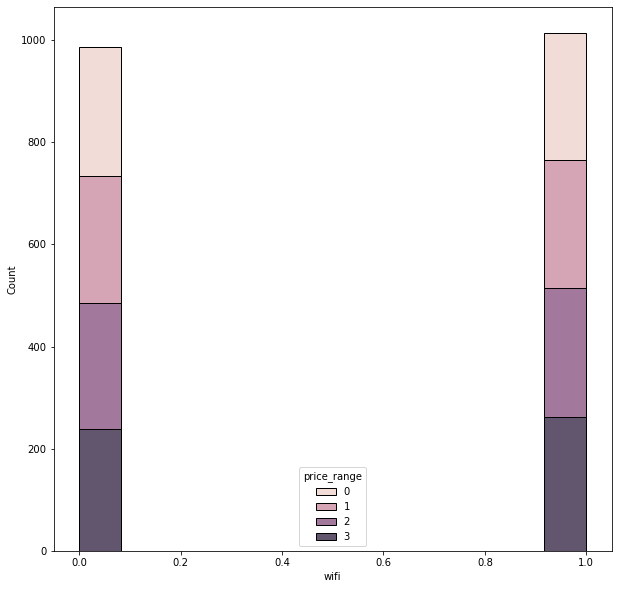

In [15]:
#Analysis with respect to target variable "price_range"

for i in df.columns[:-1]:
    plt.figure(figsize=(10, 10))
    sns.histplot(x=df[i], hue=df["price_range"], multiple="stack")
    print("Distribution of ",i ,"with respect to price range")
    plt.show()

<h2>3. Outlier Detection

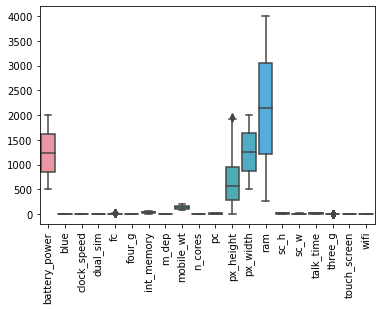

In [16]:
df_copy=df.drop(["price_range"],axis=1)
sns.boxplot(data=df_copy)
plt.xticks(rotation=90)
plt.show()

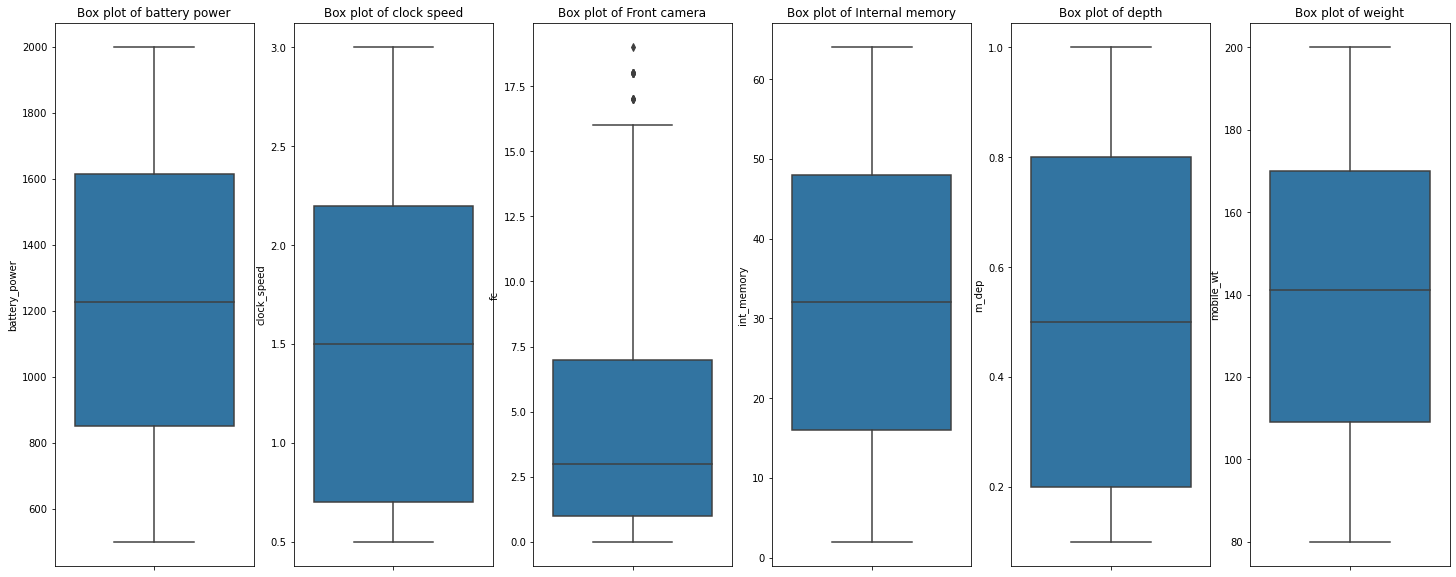

In [17]:
#Cheching invididually for outliers 
plt.figure(figsize=(25,10))
plt.subplot(1, 6, 1)
sns.boxplot(y="battery_power",data=df)
plt.title("Box plot of battery power")
            
plt.subplot(1, 6, 2)
sns.boxplot(y="clock_speed",data=df)
plt.title("Box plot of clock speed")

plt.subplot(1, 6, 3)
sns.boxplot(y="fc",data=df)
plt.title("Box plot of Front camera")

plt.subplot(1, 6, 4)
sns.boxplot(y="int_memory",data=df)
plt.title("Box plot of Internal memory")

plt.subplot(1, 6, 5)
sns.boxplot(y="m_dep",data=df)
plt.title("Box plot of depth")

plt.subplot(1, 6, 6)
sns.boxplot(y="mobile_wt",data=df)
plt.title("Box plot of weight")
plt.show()

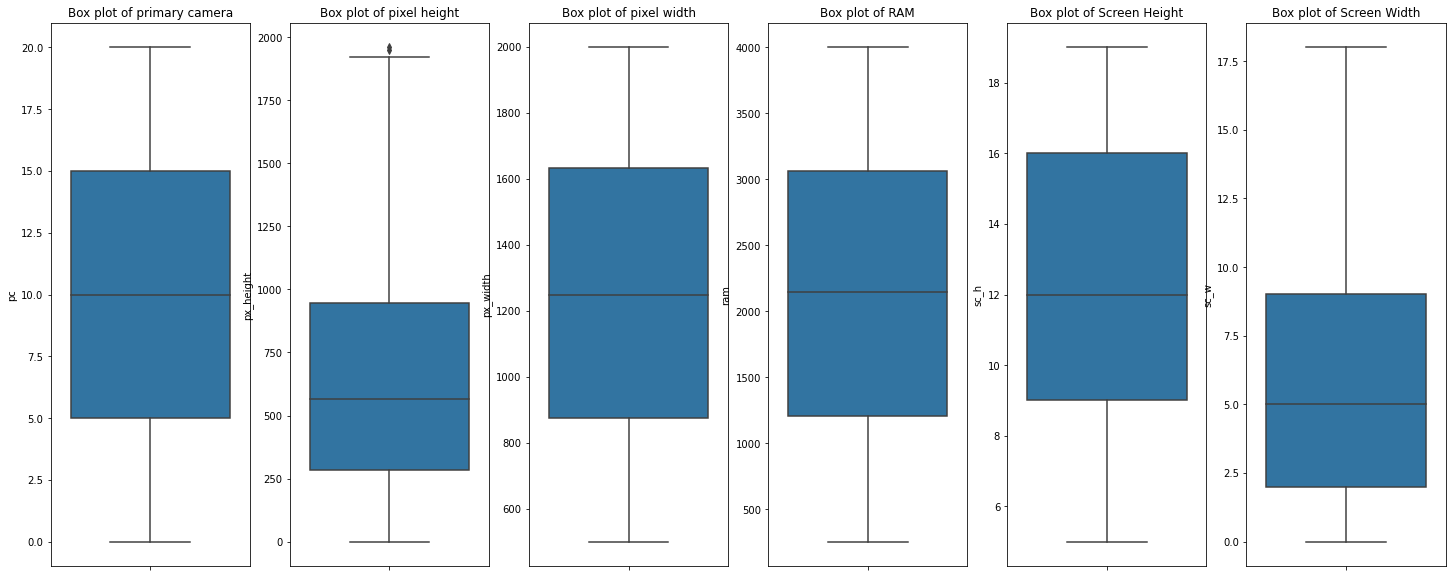

In [18]:
plt.figure(figsize=(25,10))
plt.subplot(1, 6, 1)
sns.boxplot(y="pc",data=df)
plt.title("Box plot of primary camera")
            
plt.subplot(1, 6, 2)
sns.boxplot(y="px_height",data=df)
plt.title("Box plot of pixel height")

plt.subplot(1, 6, 3)
sns.boxplot(y="px_width",data=df)
plt.title("Box plot of pixel width")

plt.subplot(1, 6, 4)
sns.boxplot(y="ram",data=df)
plt.title("Box plot of RAM")

plt.subplot(1, 6, 5)
sns.boxplot(y="sc_h",data=df)
plt.title("Box plot of Screen Height")

plt.subplot(1, 6, 6)
sns.boxplot(y="sc_w",data=df)
plt.title("Box plot of Screen Width")
plt.show()

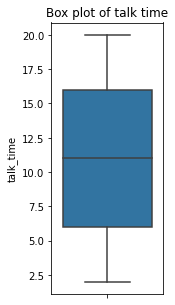

In [19]:
plt.figure(figsize=(2,5))
sns.boxplot(y="talk_time",data=df)
plt.title("Box plot of talk time")

plt.show()

Here we can see that the outliers are present in the front camera and pixel height

Bit we need not handle the outliers.

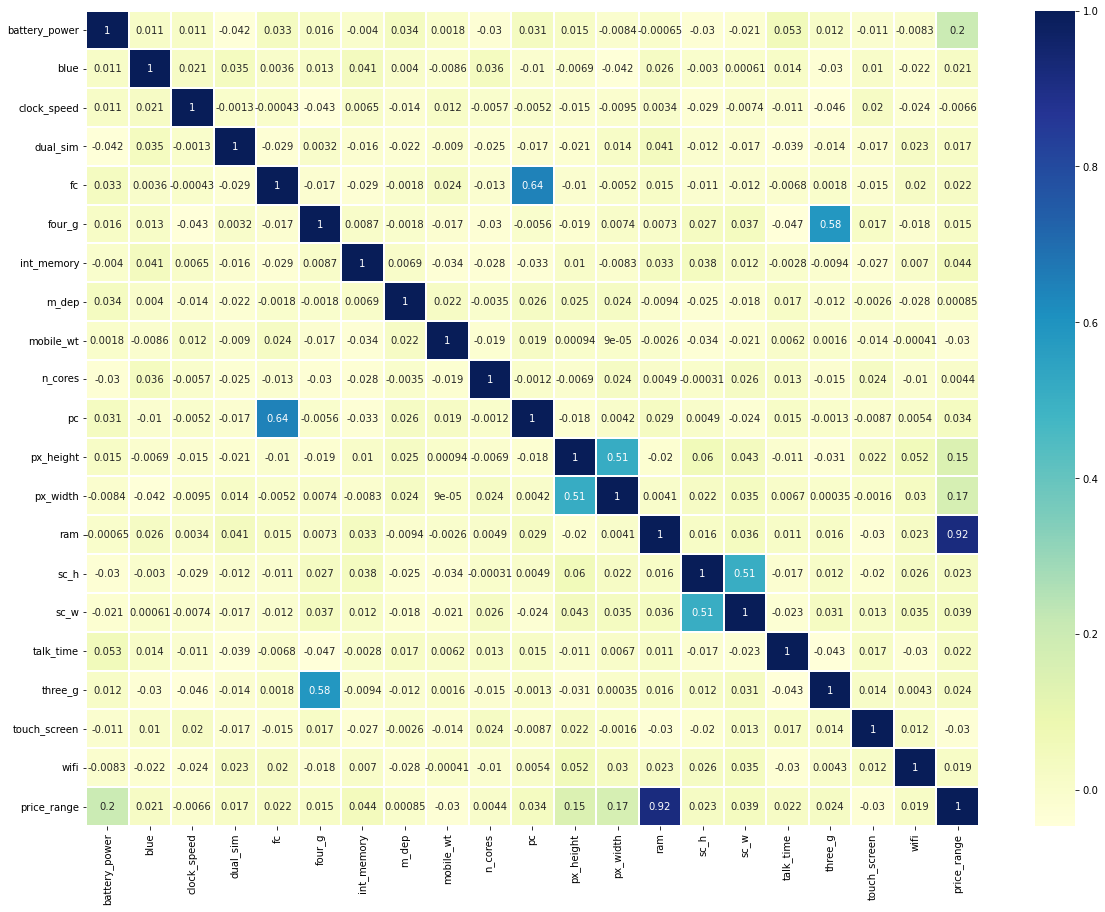

In [20]:
#heat map to find the correlation between features
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,cmap="YlGnBu")
plt.show()

Price_range is highly correlated with ram. Nothing else is significant.

<h3>Splitting dataset into Software and Hardware features


In [21]:
data1 = df.loc[:,['battery_power','blue','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt',
                  'n_cores','pc','px_height','px_width','ram','sc_h','sc_w','price_range']]
data1

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,price_range
0,842,0,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,1
1,1021,1,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,2
2,563,1,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,2
3,615,1,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,2
4,1821,1,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,0
1996,1965,1,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,2
1997,1911,0,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,3
1998,1512,0,0,4,1,46,0.1,145,5,5,336,670,869,18,10,0


In [22]:
data2 = df.loc[:,['talk_time','three_g','wifi','touch_screen','clock_speed']]
data2

,talk_time,three_g,wifi,touch_screen,clock_speed
0,19,0,1,0,2.2
1,7,1,0,1,0.5
2,9,1,0,1,0.5
3,11,1,0,0,2.5
4,15,1,0,1,1.2
...,...,...,...,...,...
1995,19,1,0,1,0.5
1996,16,1,1,1,2.6
1997,5,1,0,1,0.9
1998,19,1,1,1,0.9


In [23]:
#Merging the dataset 
data3 = pd.concat([data1, data2], axis=1)
data3

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,px_width,ram,sc_h,sc_w,price_range,talk_time,three_g,wifi,touch_screen,clock_speed
0,842,0,0,1,0,7,0.6,188,2,2,...,756,2549,9,7,1,19,0,1,0,2.2
1,1021,1,1,0,1,53,0.7,136,3,6,...,1988,2631,17,3,2,7,1,0,1,0.5
2,563,1,1,2,1,41,0.9,145,5,6,...,1716,2603,11,2,2,9,1,0,1,0.5
3,615,1,0,0,0,10,0.8,131,6,9,...,1786,2769,16,8,2,11,1,0,0,2.5
4,1821,1,0,13,1,44,0.6,141,2,14,...,1212,1411,8,2,1,15,1,0,1,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,1,2,0.8,106,6,14,...,1890,668,13,4,0,19,1,0,1,0.5
1996,1965,1,1,0,0,39,0.2,187,4,3,...,1965,2032,11,10,2,16,1,1,1,2.6
1997,1911,0,1,1,1,36,0.7,108,8,3,...,1632,3057,9,1,3,5,1,0,1,0.9
1998,1512,0,0,4,1,46,0.1,145,5,5,...,670,869,18,10,0,19,1,1,1,0.9


<h3> Ranking dataset 

In [24]:
dt = df.copy()
dt["rank_by_price"] = dt["price_range"].rank()
dt1 = dt.copy()
dt1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,750.5


In [25]:
#Sorting dataset into ranked price range
dt1.sort_values(by=["rank_by_price"])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,720,1,0.9,1,12,1,14,0.8,165,4,...,1234,1086,14,7,3,1,1,0,0,250.5
1762,808,1,0.5,1,3,0,46,0.5,105,8,...,529,1082,15,5,10,1,0,1,0,250.5
419,914,1,0.9,0,2,0,4,0.8,100,2,...,1495,808,11,7,5,1,1,0,0,250.5
846,1489,0,2.4,1,8,0,32,0.6,200,1,...,812,776,7,6,8,0,0,0,0,250.5
845,1907,0,2.0,0,13,0,55,0.9,105,7,...,1513,286,14,4,17,1,0,1,0,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1046,1,2.8,1,0,1,58,0.2,100,8,...,1040,3863,17,12,9,1,1,1,3,1750.5
982,1035,0,0.6,1,2,1,44,0.5,99,3,...,1960,3506,14,5,12,1,1,0,3,1750.5
987,1688,0,2.5,0,0,1,21,0.2,170,7,...,864,3984,17,14,8,1,1,1,3,1750.5
956,862,0,2.3,0,9,1,6,0.1,107,8,...,1977,3458,9,4,9,1,1,1,3,1750.5


In [26]:
#Ranking of all features using rank
dt2 = df.copy()
RankedDataset1 = dt2.rank()
RankedDataset1.sort_values(by="price_range")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1838,320.5,1505.5,638.5,1491.0,1853.0,1479.0,432.0,1595.5,1414.5,872.5,...,657.5,978.0,445.5,1214.0,1284.5,146.5,1239.0,1497.5,493.5,250.5
1762,435.5,1505.5,207.0,1491.0,993.5,479.0,1451.5,1003.0,436.0,1872.5,...,189.0,45.0,442.0,1353.0,1008.0,901.0,1239.0,497.5,1493.5,250.5
419,589.0,1505.5,638.5,491.0,814.0,479.0,77.5,1595.5,325.5,366.0,...,329.5,1341.0,306.0,791.5,1284.5,363.0,1239.0,1497.5,493.5,250.5
846,1323.5,505.5,1612.5,1491.0,1601.0,479.0,1011.0,1198.5,1991.0,121.5,...,288.0,408.0,292.0,287.0,1153.5,696.5,239.0,497.5,493.5,250.5
845,1875.0,505.5,1337.0,491.0,1895.5,479.0,1727.0,1797.0,436.0,1615.0,...,1231.5,1363.0,16.0,1214.0,836.5,1636.5,1239.0,497.5,1493.5,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,753.0,1505.5,1868.0,1491.0,237.5,1479.0,1828.5,427.0,325.5,1872.5,...,455.0,728.0,1919.0,1660.0,1797.5,798.5,1239.0,1497.5,1493.5,1750.5
982,737.5,505.5,450.5,1491.0,814.0,1479.0,1382.0,1003.0,309.0,612.5,...,419.5,1937.0,1732.0,1214.0,1008.0,1106.0,1239.0,1497.5,493.5,1750.5
987,1583.0,505.5,1678.5,491.0,237.5,1479.0,669.5,427.0,1496.0,1615.0,...,1134.0,481.5,1994.0,1660.0,1897.0,696.5,1239.0,1497.5,1493.5,1750.5
956,515.5,505.5,1544.5,491.0,1678.5,1479.0,142.0,160.5,472.5,1872.5,...,1371.0,1966.0,1703.5,541.5,836.5,798.5,1239.0,1497.5,1493.5,1750.5


In [27]:
#Ranking all the features separately to correct output
# Because not all features are good when values are high and not all features are good when values are low
# It depends on each and every feature


b = dt2.copy()
b["rank_by_price"] = b["price_range"].rank()
b["rank_by_battery"] = b["battery_power"].rank(ascending=False)
b["rank_by_blueooth"] = b["blue"].rank(ascending=False)
b["rank_by_clockspeed"] = b["clock_speed"].rank(ascending=False)
b["rank_by_DualSIM"] = b["dual_sim"].rank(ascending=False)
b["rank_by_fc"] = b["fc"].rank(ascending=False)
b["rank_by_4G"] = b["four_g"].rank(ascending=False)
b["rank_by_InternalMemory"] = b["int_memory"].rank(ascending=False)
b["rank_by_mdep"] = b["m_dep"].rank(ascending=False)
b["rank_by_weight"] = b["mobile_wt"].rank(ascending=True)
b["rank_by_ncores"] = b["n_cores"].rank(ascending=False)
b["rank_by_pc"] = b["pc"].rank(ascending=False)
b["rank_by_height"] = b["px_height"].rank(ascending=False)
b["rank_by_width"] = b["px_width"].rank(ascending=False)
b["rank_by_ram"] = b["ram"].rank(ascending=False)
b["rank_by_sch"] = b["sc_h"].rank(ascending=False)
b["rank_by_scw"] = b["sc_w"].rank(ascending=False)
b["rank_by_talktime"] = b["talk_time"].rank(ascending=False)
b["rank_by_3G"] = b["three_g"].rank(ascending=False)
b["rank_by_touchscreen"] = b["touch_screen"].rank(ascending=False)
b["rank_by_wifi"] = b["wifi"].rank(ascending=False)
b.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5


In [28]:
RankedDataset2 = b.iloc[:,21:]
RankedDataset2

,rank_by_price,rank_by_battery,rank_by_blueooth,rank_by_clockspeed,rank_by_DualSIM,rank_by_fc,rank_by_4G,rank_by_InternalMemory,rank_by_mdep,rank_by_weight,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,750.5,1512.5,1495.5,525.0,1510.0,1404.0,1522.0,1820.5,802.5,1783.5,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1250.5,1278.5,495.5,1794.0,510.0,1763.5,522.0,334.5,609.5,932.5,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,1250.5,1909.5,495.5,1794.0,510.0,1187.0,522.0,720.0,204.0,1069.0,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,1250.5,1830.0,495.5,322.5,1510.0,1763.5,1522.0,1710.5,405.5,846.0,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,750.5,242.0,495.5,1193.5,1510.0,105.5,522.0,619.0,802.5,1006.0,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,250.5,1587.5,495.5,1794.0,510.0,1763.5,522.0,1979.5,405.5,456.0,...,606.5,244.5,163.0,1767.0,924.0,1164.5,159.0,762.0,503.5,1507.5
1996,1250.5,58.0,495.5,258.0,510.0,1763.5,1522.0,784.5,1574.0,1766.5,...,1650.0,536.0,54.5,1062.0,1209.5,375.0,471.5,762.0,503.5,507.5
1997,1750.5,121.5,1495.5,1362.5,510.0,1404.0,522.0,860.0,609.5,486.5,...,1650.0,583.5,502.0,504.0,1459.5,1715.5,1638.0,762.0,503.5,1507.5
1998,250.5,648.0,1495.5,1362.5,1510.0,856.0,522.0,549.5,1840.5,1069.0,...,1479.0,1395.5,1792.5,1664.5,184.5,375.0,159.0,762.0,503.5,507.5


<h1> Standardization 

In [29]:
X=df.drop('price_range',axis=1)
y=df['price_range']

In [30]:
cols=X.columns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = sc.fit_transform(X)
df_scaled = pd.DataFrame(df_scaled, columns=cols)
df_scaled

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097


In [31]:
df_scaled.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

<h2> Model Building 

In [32]:
#Checking the imbalance of the dataset
y.value_counts(normalize=True).to_frame()

,price_range
1,0.25
2,0.25
3,0.25
0,0.25


This is a balanced dataset

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

<h2> 1. Logistic Regression 

In [34]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
logi_model = LogisticRegression()
logi_model.fit(X_train, y_train)

y_pred = logi_model.predict(X_test)

# Summary of the predictions made by the classifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('Accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       124
           1       0.54      0.57      0.56       110
           2       0.47      0.46      0.47       125
           3       0.72      0.71      0.71       141

    accuracy                           0.65       500
   macro avg       0.65      0.65      0.65       500
weighted avg       0.65      0.65      0.65       500

[[104  18   2   0]
 [ 17  63  25   5]
 [  0  33  58  34]
 [  0   2  39 100]]
Accuracy is 0.65


In [35]:
print('Accuracy score is',accuracy_score(y_test,y_pred))

Accuracy score is 0.65


- 58 misclassifications

<H2>2. Support Vector Machine

In [45]:
# Support Vector Machine  How do we know which kernal to use?

from sklearn.svm import SVC

classifier1 = SVC(kernel='linear')
classifier1.fit(X_train, y_train)

y_pred = classifier1.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))  

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       124
           1       0.97      0.97      0.97       110
           2       0.95      0.98      0.96       125
           3       0.99      0.97      0.98       141

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500

[[123   1   0   0]
 [  1 107   2   0]
 [  0   2 122   1]
 [  0   0   4 137]]
accuracy is 0.978


<h2>3. Decision Tree

In [37]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       124
           1       0.73      0.73      0.73       110
           2       0.69      0.69      0.69       125
           3       0.85      0.86      0.85       141

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500

[[113  11   0   0]
 [ 10  80  20   0]
 [  0  17  86  22]
 [  0   1  19 121]]
accuracy is 0.8


<h2> 4. Random Forest 

In [38]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500,max_depth=10,random_state =42,
                            criterion='entropy',max_features='log2')
classifer = rf.fit(X_train,y_train) #training the data set

y_predict = classifier.predict(X_test) #predicting based on test data

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       124
           1       0.73      0.73      0.73       110
           2       0.69      0.69      0.69       125
           3       0.85      0.86      0.85       141

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500

[[113  11   0   0]
 [ 10  80  20   0]
 [  0  17  86  22]
 [  0   1  19 121]]
accuracy is 0.8


<h2> 5. Gradient Boosting Classifer

In [39]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
model = gb.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       124
           1       0.90      0.91      0.90       110
           2       0.87      0.87      0.87       125
           3       0.94      0.93      0.94       141

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500

[[121   3   0   0]
 [  3 100   7   0]
 [  0   8 109   8]
 [  0   0  10 131]]
accuracy is 0.922


<h2> 6. XGB Classifer

In [40]:
from xgboost import XGBClassifier 
xgb= XGBClassifier()
xgb_model = xgb.fit(X_train,y_train)

y_pred = xgb_model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       124
           1       0.89      0.89      0.89       110
           2       0.89      0.84      0.86       125
           3       0.93      0.95      0.94       141

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500

[[122   2   0   0]
 [  6  98   6   0]
 [  0  10 105  10]
 [  0   0   7 134]]
accuracy is 0.918


<h2> 7. Gaussian Naiver Bayes

In [41]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       124
           1       0.74      0.75      0.75       110
           2       0.74      0.73      0.73       125
           3       0.92      0.92      0.92       141

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500

[[117   7   0   0]
 [  6  83  21   0]
 [  0  22  91  12]
 [  0   0  11 130]]
accuracy is 0.842


In [46]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
   LogisticRegression(),
    SVC(kernel='linear'),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    GaussianNB()
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

LogisticRegression
****Results****
Accuracy: 65.0000%
SVC
****Results****
Accuracy: 97.8000%
DecisionTreeClassifier
****Results****
Accuracy: 80.6000%
RandomForestClassifier
****Results****
Accuracy: 88.0000%
GradientBoostingClassifier
****Results****
Accuracy: 92.2000%
XGBClassifier
****Results****
Accuracy: 91.8000%
GaussianNB
****Results****
Accuracy: 84.2000%


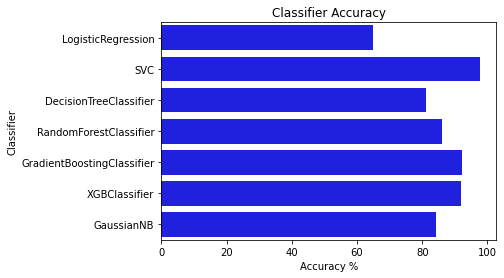

In [43]:

sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

We see that support vector machine gives the best accuracy of 97.8%

<h2> Test dataset to predict the results 

In [56]:
df_test = pd.read_csv("MobileTest.csv",index_col = 'id')

In [58]:
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [57]:
df_test_scaled = sc.fit_transform(df_test)
df_test_scaled

array([[-0.47545131,  0.968496  ,  0.31260069, ..., -1.76021608,
         1.        , -1.01409939],
       [-0.94278218,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 1.29207729,  0.968496  ,  1.51908734, ..., -1.76021608,
         1.        ,  0.98609664],
       ...,
       [-0.1469316 , -1.03252879, -0.16999397, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 0.65817305,  0.968496  , -1.25583195, ..., -1.76021608,
         1.        , -1.01409939],
       [ 0.04971753,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        ,  0.98609664]])

In [59]:
test_pred=classifier1.predict(df_test_scaled)

In [60]:
result = pd.DataFrame(test_pred)

In [61]:
result.to_csv('result.csv')

In [ ]:
print('accuracy is',accuracy_score(test_pred,y_test))